# Dynamic Time Warping with Python

In [31]:
import yfinance as yf
import numpy as np
from dtaidistance import dtw
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import pearsonr
from dtaidistance import dtw_visualisation as dtwvis
import random

### DTW Distance Measure Between Two Time Series


In [19]:
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance = dtw.distance(s1, s2)
print(distance)

1.4142135623730951


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

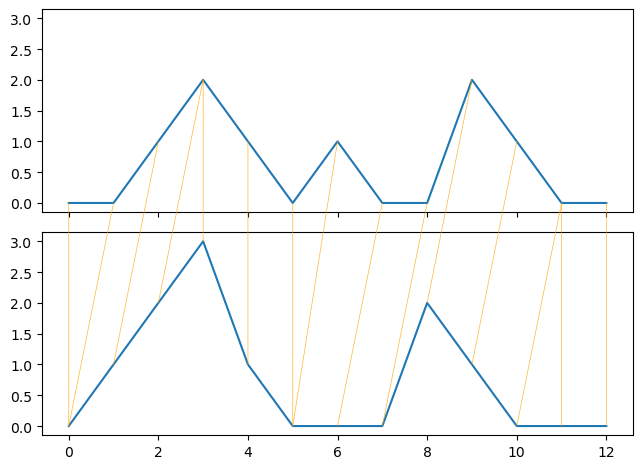

In [23]:
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

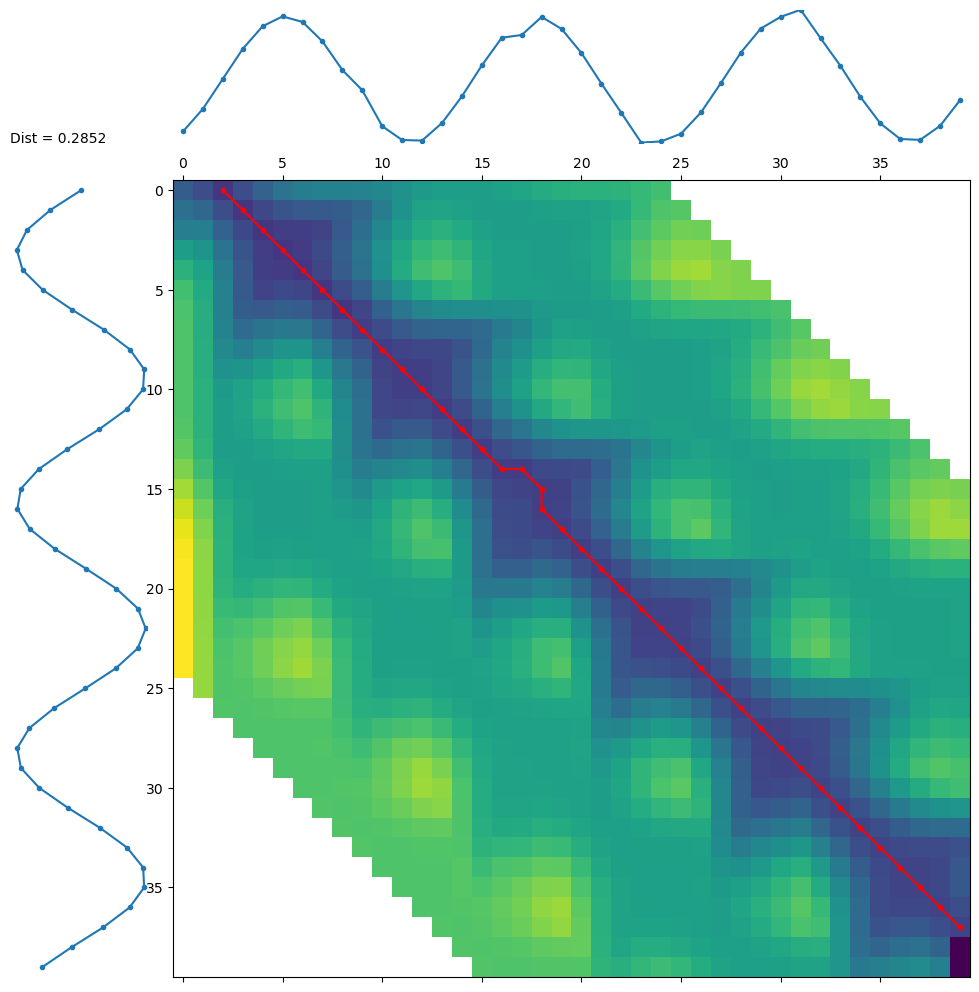

In [30]:
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

### Step 1: Fetch Time Series Data

We’ll fetch historical stock price data for Tesla (TSLA) and Amazon (AMZN) over the past year.



In [6]:
# Fetching historical stock price data
ticker_1 = yf.Ticker("TSLA")
ticker_2 = yf.Ticker("AMZN")

# Get data for the last year
data_1 = ticker_1.history(period="1y")
data_2 = ticker_2.history(period="1y")

# Use the closing price for comparison
series_1 = data_1['Close'].values
series_2 = data_2['Close'].values

### Step 2: Handle Missing Data and Alignment


We’ll ensure both time series are of the same length and handle any potential missing data.



In [9]:
# Check for missing values
print("Missing values in TSLA series:", np.isnan(series_1).sum())
print("Missing values in AMZN series:", np.isnan(series_2).sum())

# Handle missing values by forward filling (if necessary)
series_1 = pd.Series(series_1).fillna(method='ffill').values
series_2 = pd.Series(series_2).fillna(method='ffill').values

# Ensure both series are of equal length
min_length = min(len(series_1), len(series_2))
series_1 = series_1[:min_length]
series_2 = series_2[:min_length]

Missing values in TSLA series: 0
Missing values in AMZN series: 0


### Step 3: Apply Dynamic Time Warping


Now, we’ll calculate the DTW distance between the two stock price time series.



In [11]:
# Calculate DTW distance
distance = dtw.distance(series_1, series_2)
print(f"DTW distance between TSLA and AMZN: {distance}")

DTW distance between TSLA and AMZN: 690.3210186439535


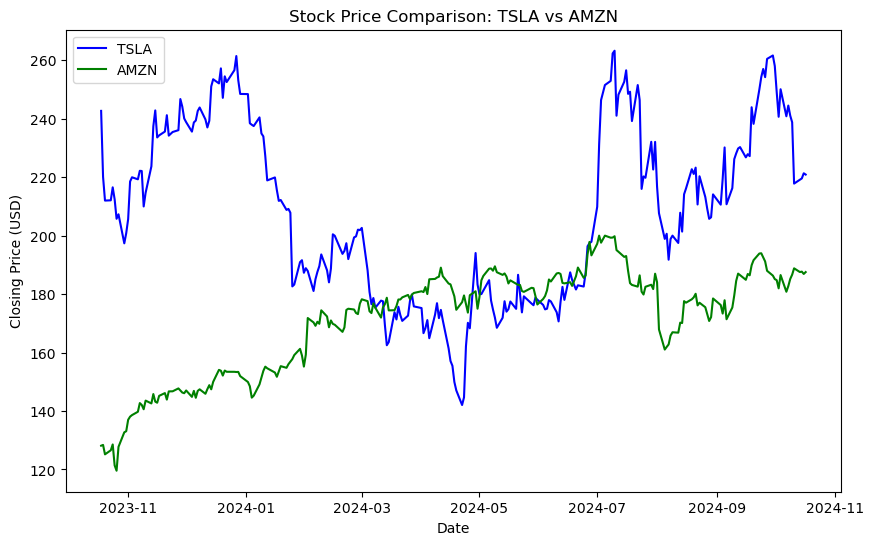

In [12]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(data_1.index[:min_length], series_1, label="TSLA", color="blue")
plt.plot(data_2.index[:min_length], series_2, label="AMZN", color="green")
plt.title("Stock Price Comparison: TSLA vs AMZN")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

The DTW distance of 690.321 between TSLA and AMZN indicates that the stock price movements of Tesla and Amazon over the past year are somewhat dissimilar. They may share some overall market trends, but the specifics of their price changes—such as the timing and magnitude of increases or decreases—differ significantly. This distance reflects the unique behaviors and market dynamics influencing each company’s stock.

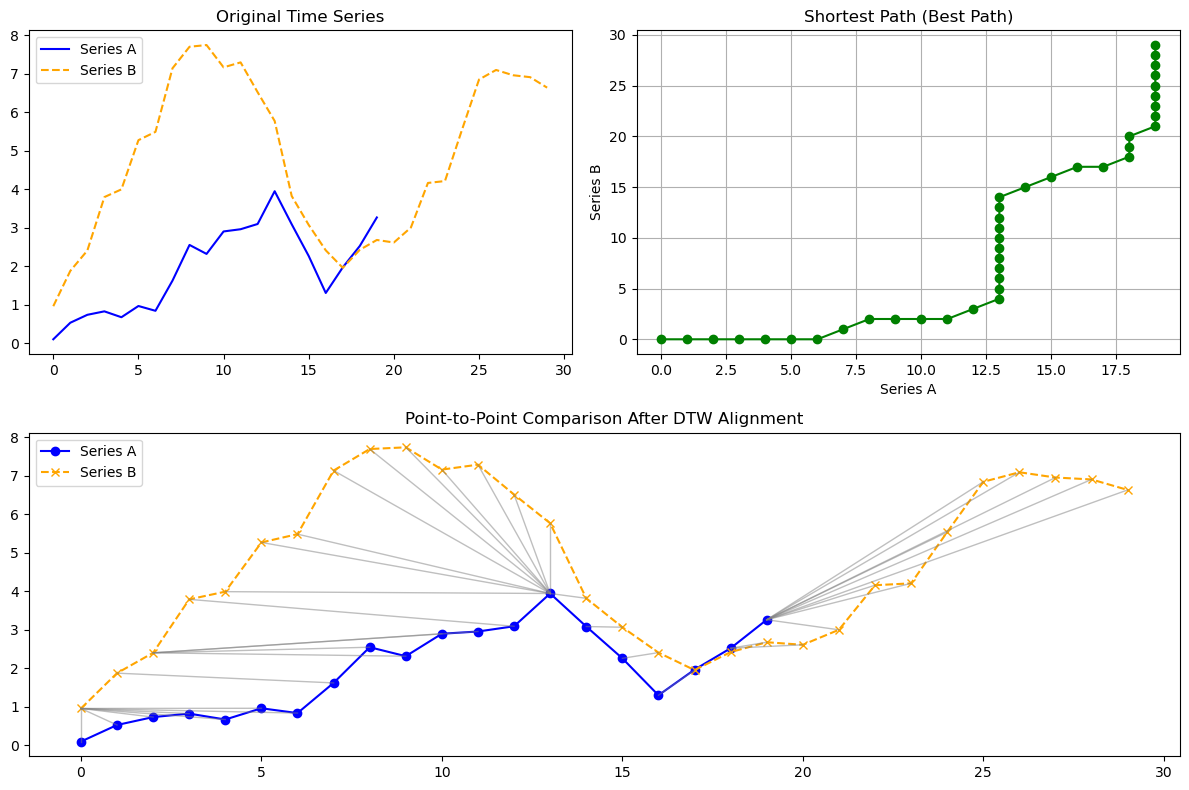

,Metric,Value,Description
0,DTW Similarity Score,0.306018,Lower scores indicate greater similarity betwe...


In [18]:
# Generate dummy data for the time series

np.random.seed(0)
time_series_a = np.cumsum(np.random.rand(20) * 2 - 1)
time_series_b = np.cumsum(np.random.rand(30) * 2 - 1 + np.sin(np.linspace(0, 3 * np.pi, 30)))

# Calculate DTW distance and obtain the warping paths (no need for the C library)
distance, paths = dtw.warping_paths(time_series_a, time_series_b, use_c=False)
best_path = dtw.best_path(paths)

similarity_score = distance / len(best_path)

plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

# Shortest Path Plot (Cost Matrix with the path)
# In this example, only the path is plotted, not the entire cost matrix.

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 'green', marker='o', linestyle='-')
ax2.set_title('Shortest Path (Best Path)')
ax2.set_xlabel('Series A')
ax2.set_ylabel('Series B')
ax2.grid(True)


# Point-to-Point Comparison Plot
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(time_series_a, label='Series A', color='blue', marker='o')
ax3.plot(time_series_b, label='Series B', color='orange', marker='x', linestyle='--')
for a, b in best_path:
    ax3.plot([a, b], [time_series_a[a], time_series_b[b]], color='grey', linestyle='-', linewidth=1, alpha = 0.5)
ax3.set_title('Point-to-Point Comparison After DTW Alignment')
ax3.legend()

plt.tight_layout()
plt.show()

# Create a DataFrame to display the similarity score and correlation coefficient
results_df = pd.DataFrame({
    'Metric': ['DTW Similarity Score'],
    'Value': [similarity_score]
})

# Add descriptions for the results
results_df['Description'] = [
    "Lower scores indicate greater similarity between the time series."
]

results_df


**The Shortest Path graph**

The “Shortest Path (Best Path)” plot visualises the optimal alignment path determined by the DTW algorithm between the two time series. In this plot:

- The horizontal axis represents the index of points in Series A.

- The vertical axis represents the index of points in Series B.

The green dots represent the mapping of points from Series A to Series B that DTW has found as the best alignment. The line connecting these points demonstrates the sequence in which the points in Series A map to points in Series B.

A step up indicates that a single point in Series A corresponds to multiple points in Series B, suggesting that in that segment, Series B moves slower (or has more detail) than Series A. A step to the right indicates the opposite, where a single point in Series B maps to multiple points in Series A. A diagonal move indicates a one-to-one mapping, showing that both series progress at the same pace.

**The ‘point-to-point’ graph**

The “Point-to-Point Comparison After DTW Alignment” plot illustrates the actual alignment of the two time series based on the optimal path from DTW algorithm:

Each point in Series A (blue line with circles) is connected by a gray line to its corresponding point in Series B (orange dashed line with crosses), as determined by DTW. The direct connections between the points highlight the warping of the time axis and show how specific points in one series align with those in another. For example, a peak in series A may correspond to a peak in Series B even if they occur at different times in the original series. This alignment accounts for variations in speed or timing between the series. Basically, its a visalisation of the ‘warping’ that DTW suggests for aligning the two sequences.

Shorter lines indicate closer matches between the series at those points, longer lines show the stretching that was needed to align them.

A score of 0 would mean that both series were identical. A score of 1 would mean that they are not similar at all. Anything in between is relative, so scores under 0.5 indicate more similarity and > 0.5 indicate less similarity. So in this case a score of 0.3 indicates there is similarity

### References

https://medium.com/@markstent/dynamic-time-warping-a8c5027defb6

https://www.geeksforgeeks.org/dynamic-time-warping-dtw-in-time-series/